In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import sys
import os

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

FILE_ALUGUEL = ["Aluguel2.csv", "Aluguel.csv"]
df_aluguel, df_impressora, df_pessoa_juridica = None, None, None

def carregar_df(nomes_possiveis):
    for nome in nomes_possiveis:
        try:
            df = pd.read_csv(nome, encoding='latin-1')
            print(f"DataFrame carregado com sucesso de '{nome}'.")
            return df
        except FileNotFoundError:
            continue
    return None

df_aluguel = carregar_df(FILE_ALUGUEL)
df_impressora = carregar_df(["Impressora.csv"])
df_pessoa_juridica = carregar_df(["PessoaJuridica.csv"])

if df_aluguel is None or df_impressora is None or df_pessoa_juridica is None:
    print("\nERRO FATAL: Falha ao carregar um ou mais arquivos CSV.")
    sys.exit(1)

print("\n--- Inspeção Inicial de df_aluguel ---")
print(df_aluguel.head())

DataFrame carregado com sucesso de 'Aluguel2.csv'.
DataFrame carregado com sucesso de 'Impressora.csv'.
DataFrame carregado com sucesso de 'PessoaJuridica.csv'.

--- Inspeção Inicial de df_aluguel ---
   ID  ID_Cliente ID_Tipo_de_impressora  Duracao_em_meses  Valor_Total
0   1        5916        Brother 7065dn                 3      2997.75
1   2        5402         HP MFP M225dw                 3      2982.06
2   3        6689            HP P2055dn                 3      1500.24
3   4        9776            HP M1212nf                 3      2992.89
4   5        1228            HP M1212nf                 2      1995.26


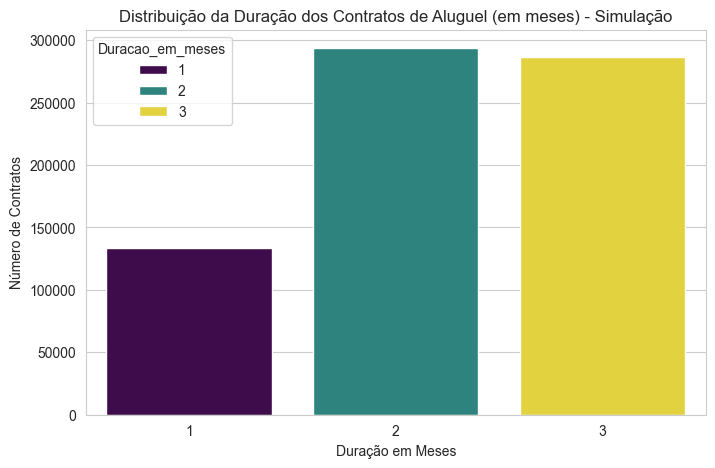

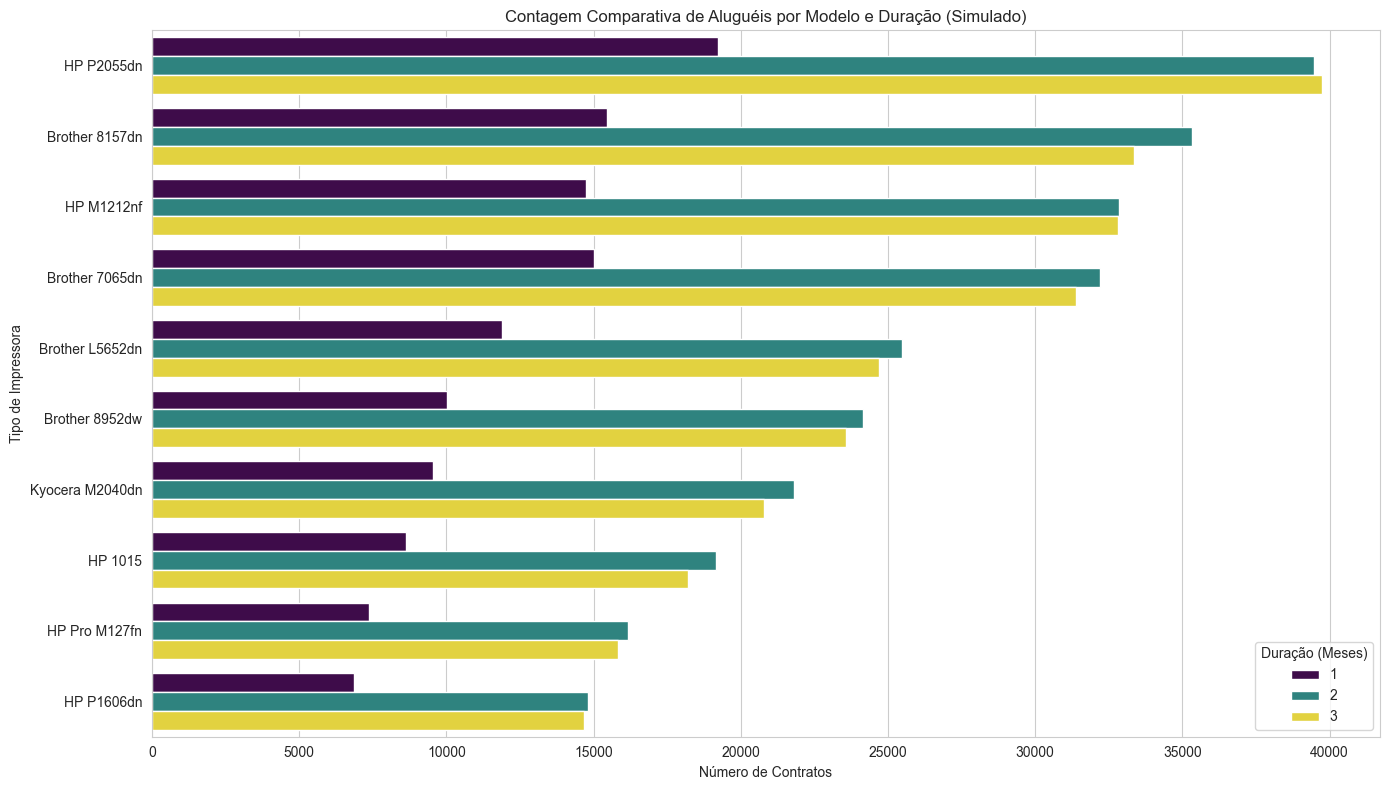

In [11]:
DESCONTO_2M = 0.95
DESCONTO_3M = 0.90
df_aluguel.loc[df_aluguel['Duracao_em_meses'] == 2, 'Valor_Total'] *= DESCONTO_2M
df_aluguel.loc[df_aluguel['Duracao_em_meses'] == 3, 'Valor_Total'] *= DESCONTO_3M

MODELO_SECUNDARIO_DESTACADO = 'HP MFP M225dw'
df_aluguel.loc[df_aluguel['ID_Tipo_de_impressora'] == MODELO_SECUNDARIO_DESTACADO, 'Valor_Total'] *= 1.8

df_curta = df_aluguel[df_aluguel['Duracao_em_meses'].isin([1, 2])]
df_aluguel_count_demo = pd.concat([df_aluguel, df_curta] * 5, ignore_index=True)

plt.figure(figsize=(8, 5))
sns.countplot(data=df_aluguel_count_demo, x='Duracao_em_meses', hue='Duracao_em_meses', palette="viridis")
plt.title('Distribuição da Duração dos Contratos de Aluguel (em meses) - Simulação')
plt.xlabel('Duração em Meses')
plt.ylabel('Número de Contratos')
plt.show()

top_10_modelos = df_aluguel_count_demo['ID_Tipo_de_impressora'].value_counts().nlargest(10).index
df_comparativo = df_aluguel_count_demo[df_aluguel_count_demo['ID_Tipo_de_impressora'].isin(top_10_modelos)]

plt.figure(figsize=(14, 8))
sns.countplot(
    data=df_comparativo,
    y='ID_Tipo_de_impressora',
    hue='Duracao_em_meses',
    order=top_10_modelos,
    palette='viridis'
)
plt.title('Contagem Comparativa de Aluguéis por Modelo e Duração (Simulado)')
plt.xlabel('Número de Contratos')
plt.ylabel('Tipo de Impressora')
plt.legend(title='Duração (Meses)')
plt.tight_layout()
plt.show()

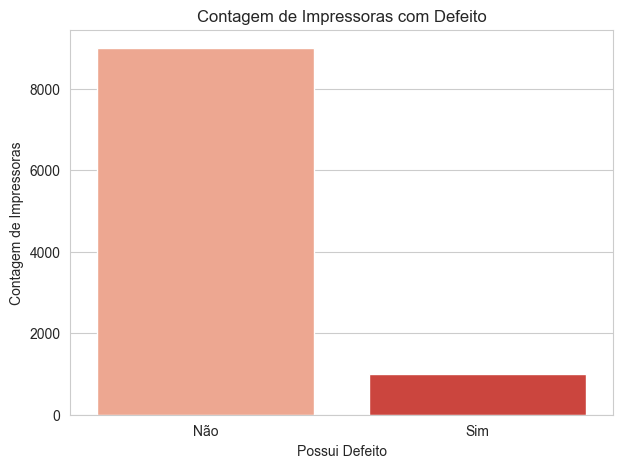

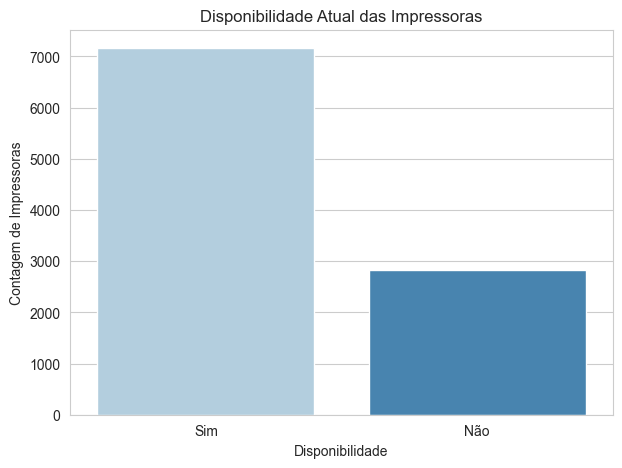

In [10]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df_impressora, x='Possui_defeito', hue='Possui_defeito', palette="Reds")
plt.title('Contagem de Impressoras com Defeito')
plt.xlabel('Possui Defeito')
plt.ylabel('Contagem de Impressoras')
plt.show()

plt.figure(figsize=(7, 5))
sns.countplot(data=df_impressora, x='Disponibilidade', hue='Disponibilidade', palette="Blues")
plt.title('Disponibilidade Atual das Impressoras')
plt.xlabel('Disponibilidade')
plt.ylabel('Contagem de Impressoras')
plt.show()

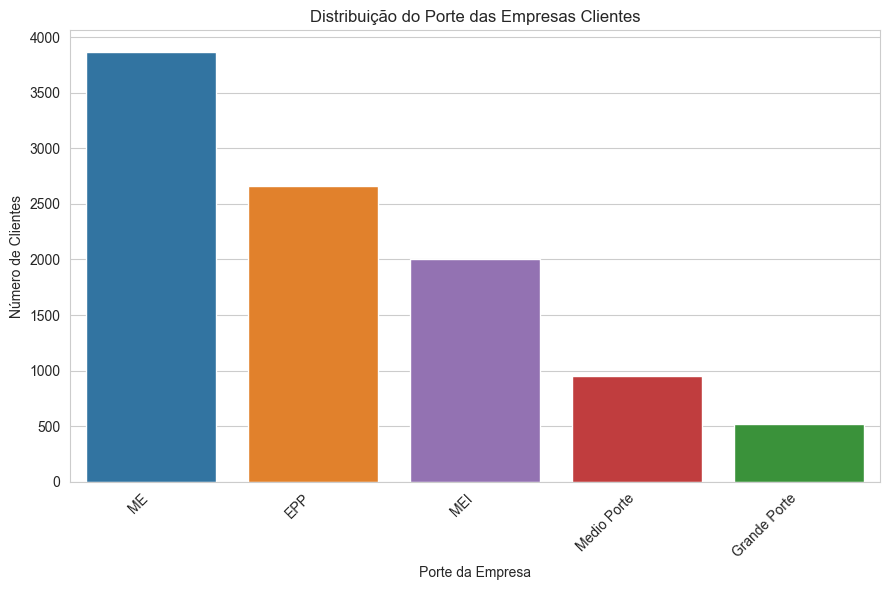

In [9]:
plt.figure(figsize=(9, 6))
porte_counts = df_pessoa_juridica['Porte'].value_counts()
sns.countplot(data=df_pessoa_juridica, x='Porte', hue='Porte', palette="tab10",
              order=porte_counts.index)
plt.title('Distribuição do Porte das Empresas Clientes')
plt.xlabel('Porte da Empresa')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

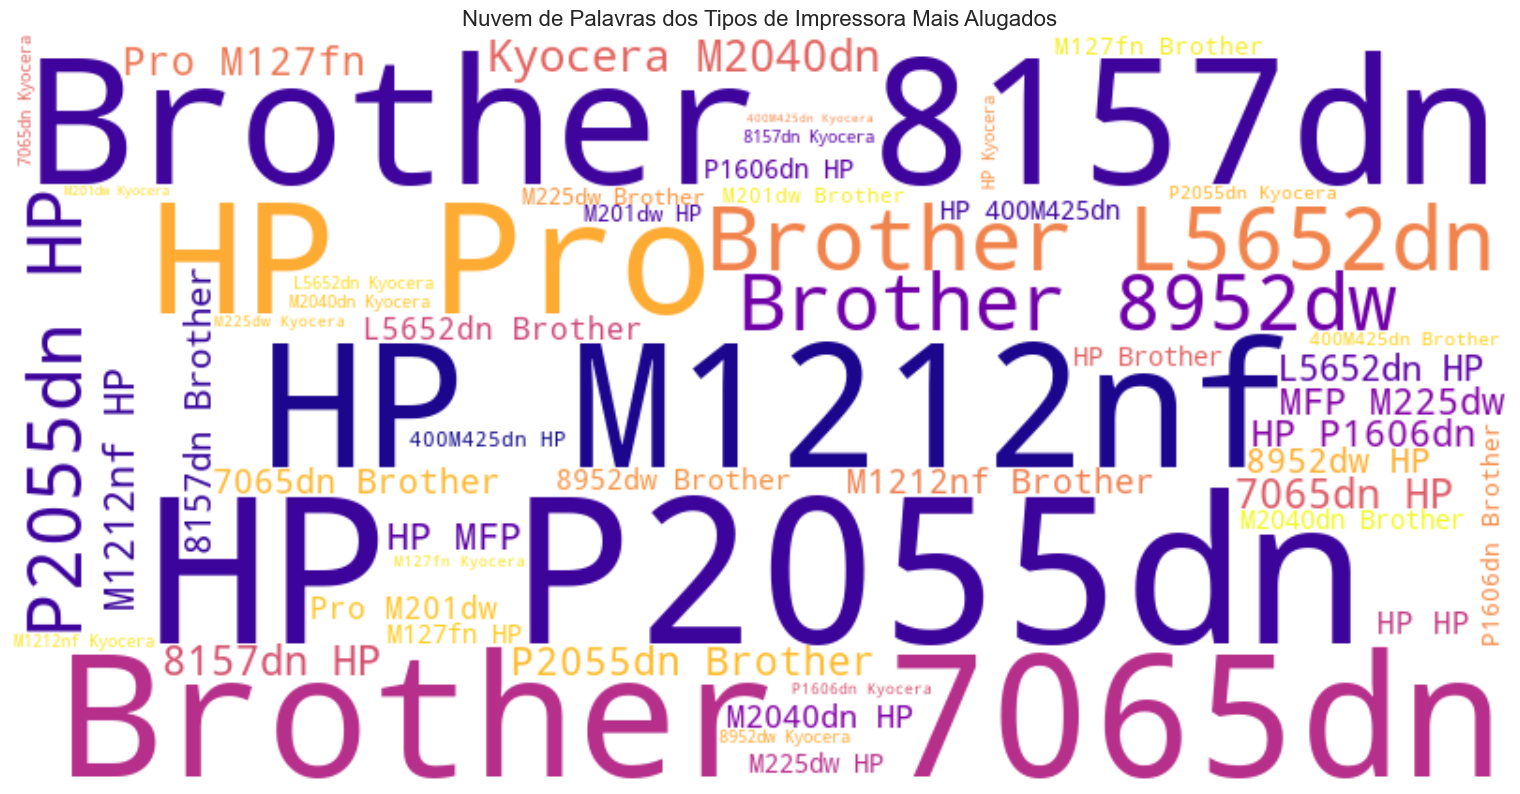

In [8]:
text = " ".join(printer for printer in df_aluguel['ID_Tipo_de_impressora'].astype(str))

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='plasma',
    max_words=100,
    random_state=42
).generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nuvem de Palavras dos Tipos de Impressora Mais Alugados', fontsize=16)
plt.tight_layout(pad=0)
plt.show()